In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

2025-02-27 12:00:23.421662: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load Dataset

In [2]:
(train, y_train) , (test, y_test) = mnist.load_data()

In [3]:
train.shape

(60000, 28, 28)

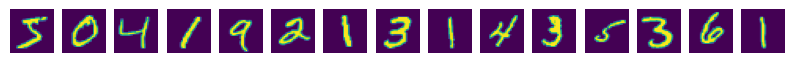

In [12]:
figure, axes = plt.subplots(1, 15, figsize=(10, 15))
for i in range(15):
  axes[i].imshow(train[i])
  axes[i].axis('off')
plt.show()

## Normalizing Data

In [13]:
train = train / 255.
test = test / 255.

## Modeling

In [6]:
def build_model():
  model = Sequential()
  model.add(Input((28, 28)))
  model.add(Flatten())
  model.add(Dense(300, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [7]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2025-02-27 12:00:57.859656: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
y_train.shape

(60000,)

In [9]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train, y_train,
    batch_size=32,
    epochs=20, validation_split=.1
) 

Epoch 1/20
1688/1688 [==============================] - 27s 16ms/step - loss: 0.2148 - accuracy: 0.9352 - val_loss: 0.1106 - val_accuracy: 0.9675
Epoch 2/20
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0922 - accuracy: 0.9736 - val_loss: 0.0852 - val_accuracy: 0.9760
Epoch 3/20
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0659 - accuracy: 0.9803 - val_loss: 0.0808 - val_accuracy: 0.9803
Epoch 4/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0514 - accuracy: 0.9849 - val_loss: 0.1007 - val_accuracy: 0.9768
Epoch 5/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0428 - accuracy: 0.9880 - val_loss: 0.1060 - val_accuracy: 0.9750
Epoch 6/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0330 - accuracy: 0.9905 - val_loss: 0.0937 - val_accuracy: 0.9802
Epoch 7/20
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.1333 -

In [31]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [32]:
model.get_layer('dense_3')

<Dense name=dense_3, built=True>

In [35]:
hidden = model.layers[1]

In [36]:
hidden is model.get_layer('dense_3')

True

In [42]:
weights, biases = hidden.get_weights()

In [43]:
weights.shape, biases.shape

((784, 300), (300,))

In [48]:
model = build_model()
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [50]:
y_train.shape

(60000, 10)

In [51]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [52]:
model.fit(
    train, y_train,
    batch_size=32,
    validation_split=.2, epochs=10
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8855 - loss: 0.3792 - val_accuracy: 0.9680 - val_loss: 0.1140
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9696 - loss: 0.1044 - val_accuracy: 0.9731 - val_loss: 0.0945
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9794 - loss: 0.0684 - val_accuracy: 0.9754 - val_loss: 0.0904
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9854 - loss: 0.0485 - val_accuracy: 0.9754 - val_loss: 0.1048
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9893 - loss: 0.0348 - val_accuracy: 0.9782 - val_loss: 0.0998
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9917 - loss: 0.0287 - val_accuracy: 0.9783 - val_loss: 0.1034
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9931 - loss: 0.0243 - val_accuracy: 0.9758 - val_loss: 0.1252
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9948 - loss: 0.0

In [53]:
model.evaluate(test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.1572


[0.1260073184967041, 0.9793999791145325]

In [55]:
model.predict(test[10:20]).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


(10, 10)